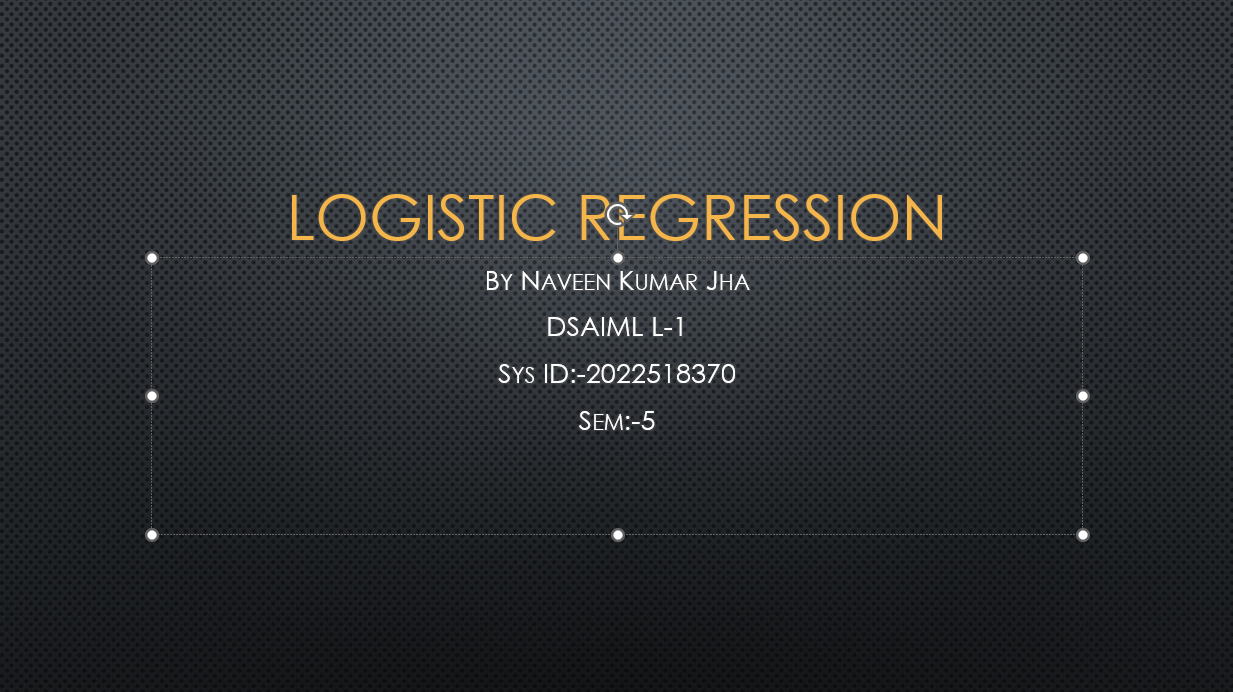

In [11]:
import warnings

In [12]:
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [13]:
import pandas as pd
import numpy as np

In [14]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

In [16]:
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

In [17]:
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve
)

In [18]:
who=pd.read_csv("who.csv")
data=who.copy()
data.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_contienent,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,north_america,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,married,Exec-managerial,White,Male,0,0,13,north_america,<=50K
2,38,Private,215646,HS-grad,9,not_married,Handlers-cleaners,White,Male,0,0,40,north_america,<=50K
3,53,Private,234721,11th,7,married,Handlers-cleaners,Black,Male,0,0,40,north_america,<=50K
4,28,Private,338409,Bachelors,13,married,Prof-specialty,Black,Female,0,0,40,north_america,<=50K


In [19]:
data.tail()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_contienent,salary
32526,27,Private,257302,Assoc-acdm,12,married,Tech-support,White,Female,0,0,38,north_america,<=50K
32527,40,Private,154374,HS-grad,9,married,Machine-op-inspct,White,Male,0,0,40,north_america,>50K
32528,58,Private,151910,HS-grad,9,not_married,Adm-clerical,White,Female,0,0,40,north_america,<=50K
32529,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,White,Male,0,0,20,north_america,<=50K
32530,52,Self-emp-inc,287927,HS-grad,9,married,Exec-managerial,White,Female,15024,0,40,north_america,>50K


In [20]:
data.shape

(32531, 14)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32531 entries, 0 to 32530
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32531 non-null  int64 
 1   workclass               32531 non-null  object
 2   fnlwgt                  32531 non-null  int64 
 3   education               32531 non-null  object
 4   education_no_of_years   32531 non-null  int64 
 5   marital_status          32531 non-null  object
 6   occupation              32531 non-null  object
 7   race                    32531 non-null  object
 8   sex                     32531 non-null  object
 9   capital_gain            32531 non-null  int64 
 10  capital_loss            32531 non-null  int64 
 11  working_hours_per_week  32531 non-null  int64 
 12  native_contienent       32531 non-null  object
 13  salary                  32531 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [22]:
data.duplicated().sum()

0

In [23]:
data.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_contienent         0
salary                    0
dtype: int64

In [24]:
data.describe()

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week
count,32531.000000,3.253100e+04,32531.000000,32531.000000,32531.000000,32531.000000
mean,38.588362,1.897882e+05,10.081953,1078.642649,87.384341,40.441025
std,13.637644,1.055642e+05,2.571842,7388.624210,403.137260,12.347506
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178150e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783700e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370190e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [25]:
data.drop(["capital_gain", "capital_loss"], axis=1, inplace=True)

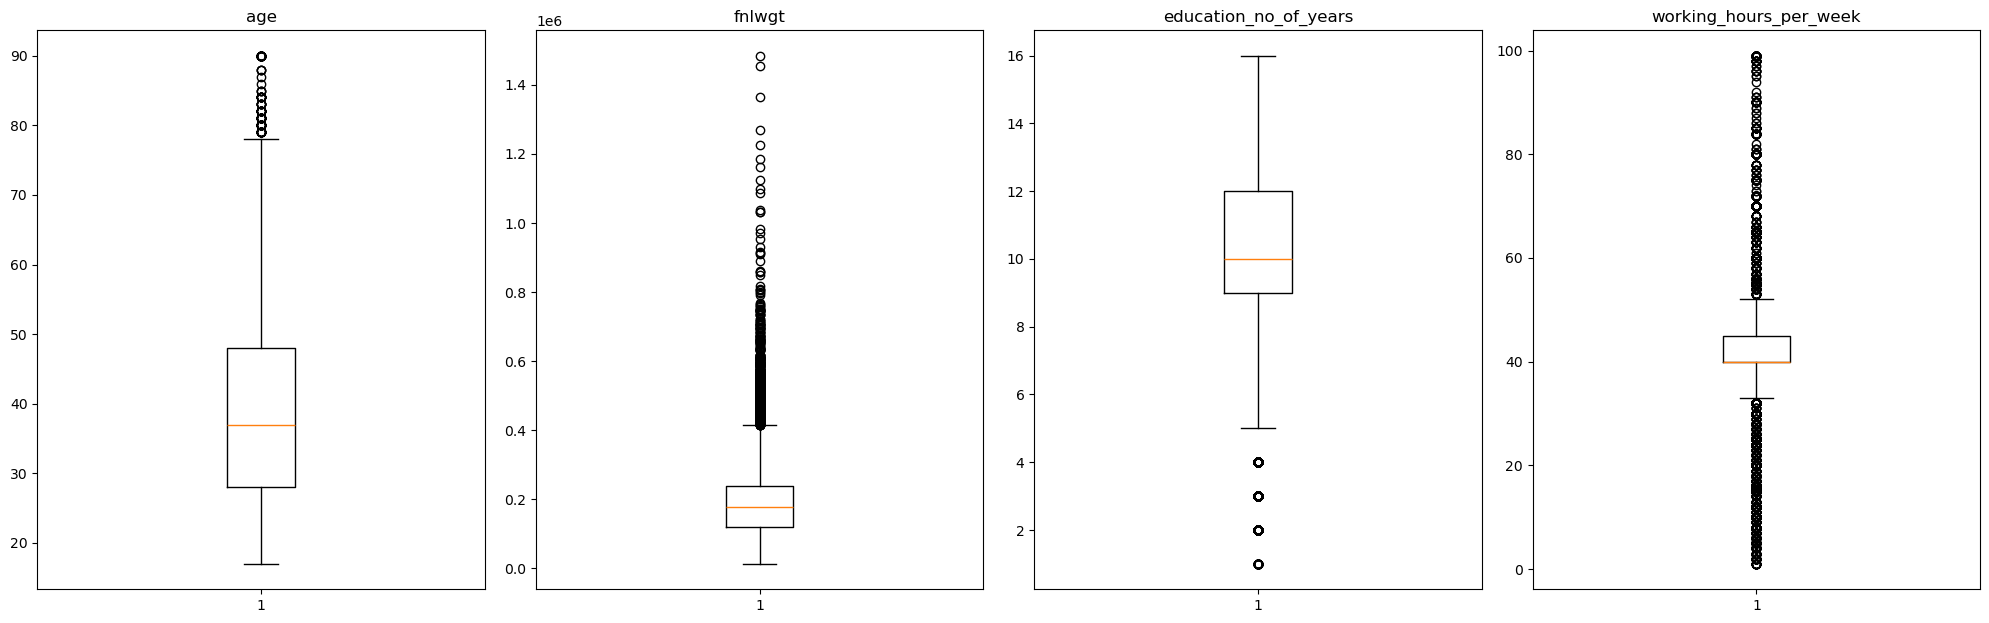

In [26]:
numerical_col=data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))
for i, variable in enumerate(numerical_col):
  plt.subplot(5,4,i+1)
  plt.boxplot(data[variable], whis=1.5)
  plt.tight_layout()
  plt.title(variable)

plt.show()

In [27]:
def treat_outliiers(df,col):
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  Lower_Whisker=Q1-1.5*IQR
  Upper_Whisker=Q3-1.5*IQR
  df[col]=np.clip(df[col],Lower_Whisker,Upper_Whisker)
  return df

In [28]:
def treat_outliers_all(df, col_list):
  for c in col_list:
    df=treat_outliiers(df, c)
    return df

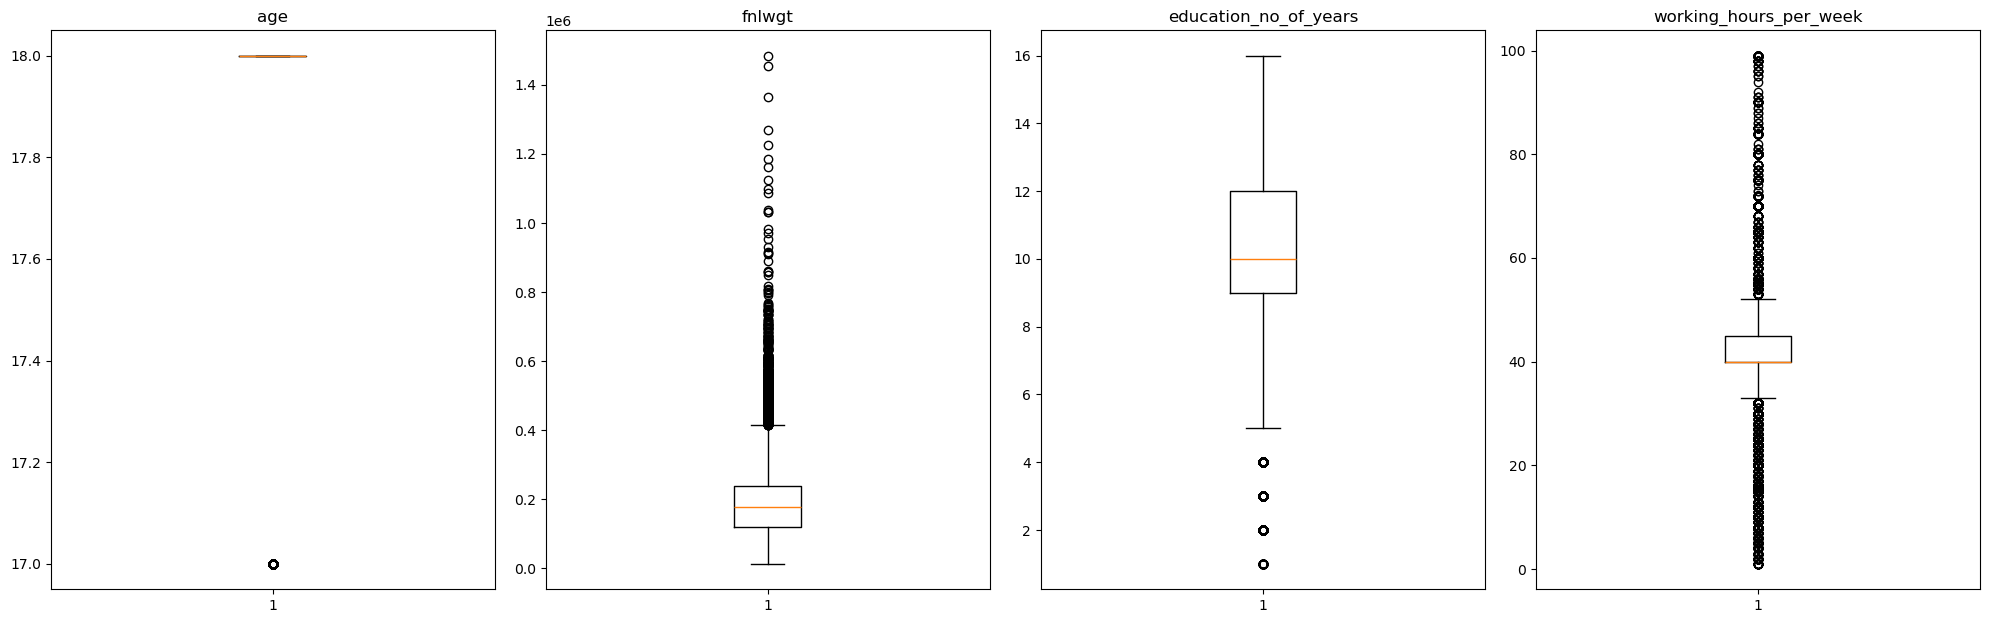

In [29]:
numerical_col=data.select_dtypes(include=np.number).columns.tolist()
data=treat_outliers_all(data, numerical_col)
plt.figure(figsize=(20,30))
for i, variable in enumerate(numerical_col):
  plt.subplot(5,4,i+1)
  plt.boxplot(data[variable], whis=1.5)
  plt.tight_layout()
  plt.title(variable)

plt.show()

In [30]:
data["salary"]=data["salary"].apply(lambda x:1 if x=="<=50K" else 0)

In [31]:
X=data.drop(["salary"], axis=1)
Y=data["salary"]

X=sm.add_constant(X)
X=pd.get_dummies(X, drop_first=True)
X=X.astype(float)
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [32]:
logit=sm.Logit(y_train,X_train.astype(float))
lg=logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22771
Model:                          Logit   Df Residuals:                    22720
Method:                           MLE   Df Model:                           50
Date:                Wed, 27 Nov 2024   Pseudo R-squ.:                     inf
Time:                        21:04:36   Log-Likelihood:            -8.0409e-09
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -12.1410   7.53e+11  -1.61e-11      1.000   -1.48e+12    1.48e+12
age                                -0.7870   1.22e+05  -6.43e-06    

In [33]:
def model_performance_classification_statsmodels(model,predictors,target,threshold=0.5):
  pred_temp=model.predict(predictors)>threshold
  pred=np.round(pred_temp)
  acc=accuracy_score(target, pred)
  recall=recall_score(target, pred)
  precision=precision_score(target, pred)
  f1=f1_score(target, pred)
  df_perf=pd.DataFrame({"Acuracy":acc, "Recall": recall, "Precision":precision,"F1":f1}, index=[0])
  return df_perf

print("Training performance:")
model_performance_classification_statsmodels(lg,X_train,y_train)

Training performance:


,Acuracy,Recall,Precision,F1
0,1.0,0.0,0.0,0.0


In [34]:
vif_series = pd.Series(
[variance_inflation_factor(X_train.values, 1) for i in range(X_train.shape[1])],

index=X_train.columns,

dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                              1.197876
age                                1.197876
fnlwgt                             1.197876
education_no_of_years              1.197876
working_hours_per_week             1.197876
workclass_Local-gov                1.197876
workclass_Never-worked             1.197876
workclass_Private                  1.197876
workclass_Self-emp-inc             1.197876
workclass_Self-emp-not-inc         1.197876
workclass_State-gov                1.197876
workclass_Unknown                  1.197876
workclass_Without-pay              1.197876
education_11th                     1.197876
education_12th                     1.197876
education_1st-4th                  1.197876
education_5th-6th                  1.197876
education_7th-8th                  1.197876
education_9th                      1.197876
education_Assoc-acdm               1.197876
education_Assoc-voc                1.197876
education_Bachelors                1.1978

In [35]:
X_train1 = X_train.drop("occupation_Unknown", axis=1)
vif_series2 = pd.Series(
[variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                               0.000000
age                                 1.197876
fnlwgt                              1.030530
education_no_of_years                    inf
working_hours_per_week              1.209916
workclass_Local-gov                 3.040499
workclass_Never-worked              1.012291
workclass_Private                   7.684447
workclass_Self-emp-inc              2.215577
workclass_Self-emp-not-inc          3.485800
workclass_State-gov                 2.315316
workclass_Unknown                   3.048758
workclass_Without-pay               1.015623
education_11th                           inf
education_12th                           inf
education_1st-4th                        inf
education_5th-6th                        inf
education_7th-8th                        inf
education_9th                            inf
education_Assoc-acdm                     inf
education_Assoc-voc                      inf
education_Bachelors 

In [36]:
X_train2 = X_train.drop("education_no_of_years", axis=1)
vif_series3 = pd.Series(
[variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
index=X_train2.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                               0.000000
age                                 1.197876
fnlwgt                              1.030530
education_no_of_years                    inf
working_hours_per_week              1.209916
workclass_Local-gov                 3.040499
workclass_Never-worked              1.012291
workclass_Private                   7.684447
workclass_Self-emp-inc              2.215577
workclass_Self-emp-not-inc          3.485800
workclass_State-gov                 2.315316
workclass_Unknown                   3.048758
workclass_Without-pay               1.015623
education_11th                           inf
education_12th                           inf
education_1st-4th                        inf
education_5th-6th                        inf
education_7th-8th                        inf
education_9th                            inf
education_Assoc-acdm                     inf
education_Assoc-voc                      inf
education_Bachelors 

In [38]:
logit2=sm.Logit(y_train, X_train2.astype(float))
lg2=logit2.fit(disp=False)

In [39]:
print('Training performance')
model_performance_classification_statsmodels(lg2,X_train2,y_train)

Training performance


,Acuracy,Recall,Precision,F1
0,1.0,0.0,0.0,0.0


In [41]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22771
Model:                          Logit   Df Residuals:                    22720
Method:                           MLE   Df Model:                           50
Date:                Wed, 27 Nov 2024   Pseudo R-squ.:                     inf
Time:                        21:08:29   Log-Likelihood:            -1.3936e-09
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -13.8826   3.83e+06  -3.62e-06      1.000   -7.51e+06    7.51e+06
age                                -0.9912   2.15e+05  -4.61e-06    